## 2. Choosing the right estimator/Algorithm for your problem

some things to note : 

* Sklearn refers to ML, Algorithms and estimators

* Classification problems - predicting a category

* Regression Problem - predicting a number

* Refer to sklearn documents for more details

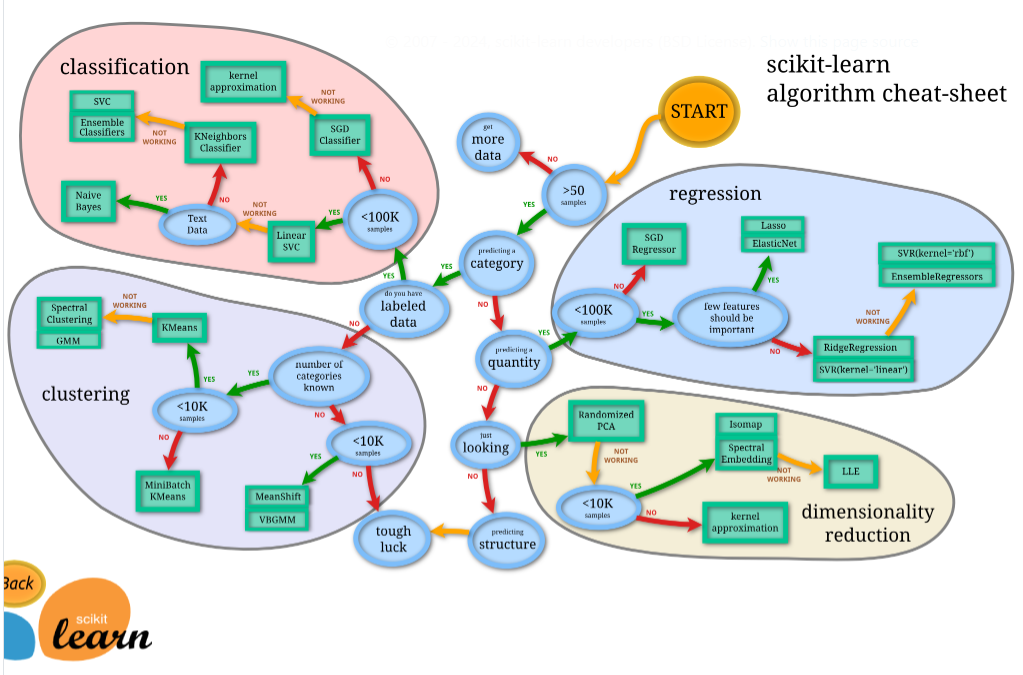

In [2]:
#Picking a Dataset : California Housing

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
import pandas as pd
import numpy as np
import sklearn

housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
housing_df = housing_df.drop("MedHouseVal",axis=1)
housing_df

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:

# Import Algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import svm

# Setup random seed
np.random.seed(42)

#Create the Data
X = housing_df.drop("target",axis= 1)
y = housing_df["target"] #median house price in $100,000s

#split into train and test sets
X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_Train,y_train)



#Check the score of model (on test set)
model.score(X_Test,y_test)


0.5758549611440126

In [ ]:
#Try a different way if current algo is not working

regr = svm.SVR()
regr.fit(X_Train,y_train)
regr.score(X_Test,y_test)

-0.01648536010717372

In [ ]:
#Try a different way if current algo is not working 2

# Import 
from sklearn.ensemble import RandomForestRegressor

#Create Random forest model
RandomForestRegr = RandomForestRegressor()
RandomForestRegr.fit(X_Train,y_train)

#Check Score
RandomForestRegr.score(X_Test,y_test)

0.8065734772187598

## 2.2 Picking a ML Model for Classification Problem



In [35]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
len(heart_disease)

303

Consulting the map we are using Linear SVC

In [ ]:
#Import the linear SVC Estimator class
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#setup random seed
np.random.seed(42)

#Make data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
X_Train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_Train,y_train)

#Evaluate the Linear SVC
clf.score(X_Test,y_test)


c:\Users\Tejas\anaconda3\envs\ML\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [ ]:
#Import the Random forest classifier class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#setup random seed
np.random.seed(42)

#Make data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
X_Train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_Train,y_train)

#Evaluate the Linear SVC
clf.score(X_Test,y_test)


0.8524590163934426

### 3. Fit the Model/Algo to use it for predictions

### 3.1 Fitting the model

In [ ]:
#Import the Random forest classifier class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#setup random seed
np.random.seed(42)

#Make data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split the data
X_Train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Instantiate LinearSVC
clf = RandomForestClassifier(n_estimators=100)

#Fit the data to model
clf.fit(X_Train,y_train)

#Evaluate the Linear SVC
clf.score(X_Test,y_test)

0.8524590163934426

### 3.2 Make predictions using a ML model

2 ways to predict :

    1. predict()

    2. predict_proba()

In [ ]:
# Use a trained model to make predictions

X_Test


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [ ]:
clf.predict(X_Test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
# compare predictions to truth labels to evaluate model
y_preds = clf.predict(X_Test)
np.mean(y_preds == y_test)

0.8524590163934426

In [ ]:
clf.score(X_Test,y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [ ]:
# Predict using predit_proba()
# predict_proba() return probablities of a classification label

clf.predict_proba(X_Test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
# Let's predict() on the same

clf.predict(X_Test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

#Split into traingin and test sets

X_Train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Create model instance

model = RandomForestRegressor()

#Fit the model
model.fit(X_Train,y_train)

#Make Predictions
y_preds = model.predict(X_Test)


In [ ]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [ ]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [ ]:
len(y_test), len(y_preds)

(4128, 4128)

In [ ]:
#compare predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)


0.32659871732073664

In [ ]:
housing_df(["preds"]) = y_preds
housing_df.head()

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (3351820812.py, line 1)

In [ ]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a ML Model

3 ways to Evaluate SKLearn Models/Estimators : 
    
    1. Estimators built in 'score()' method

    2. The  scoring parameters
    
    3. Problem-Specific metric functions

    read more : https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating model with score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Create train test split
X_Train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Create instance of classifier model\
model = RandomForestClassifier(n_estimators=100)

#Fit the model
model.fit(X_Train,y_train)

RandomForestClassifier()

In [ ]:
#Evaluate the model on training data
model.score(X_Train,y_train)

1.0

In [ ]:
#Evaluate the model on test 
# Default score( ) evaluation metrics is r_squared for regression algos
model.score(X_Test,y_test)

0.8524590163934426

### 4.2 Evaluating a model using scoring parameter


In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Create train test split
X_Train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Create instance of classifier model\
clf = RandomForestClassifier(n_estimators=100)

#Fit the model
clf.fit(X_Train,y_train)

RandomForestClassifier()

In [ ]:
clf.score(X_Test,y_test)

0.8524590163934426

In [ ]:
cross_val_score(clf,X,y,cv=12)

array([0.92307692, 0.84615385, 0.80769231, 0.88      , 0.88      ,
       0.88      , 0.84      , 0.8       , 0.8       , 0.76      ,
       0.72      , 0.76      ])

In [ ]:
#single training and test split score
clf_single_score = clf.score(X_Test,y_test)

# Take the mean of k-fold cross validation score
clf_cross_val = np.mean(cross_val_score(clf,X,y,cv=12))

#compare the two
clf_single_score,clf_cross_val

(0.8524590163934426, 0.8312820512820513)

In [ ]:
#Scoring parameter is set to None

cross_val_score(clf,X,y,cv=12,scoring=None)

array([0.92307692, 0.76923077, 0.84615385, 0.88      , 0.88      ,
       0.84      , 0.84      , 0.76      , 0.84      , 0.76      ,
       0.76      , 0.76      ])

### 4.2.1 Classsification model evaluation metrics

1. Accuracy
2. Area under curve
3. Confusion metrics
4. Classification Reports


In [ ]:
from sklearn.model_selection import cross_val_score
from  sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Create train test split
X_Train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#Create instance of classifier model\
clf = RandomForestClassifier(n_estimators=100)

#Fit the model
clf.fit(X_Train,y_train)

#Accuracy cross val
cross_val_score1 = cross_val_score(clf,X,y,cv=12)

In [ ]:
np.mean(cross_val_score1)

0.847948717948718

**Area under the reciver operating characteristics curve (AUC/ROC)1**

* AUC
* ROC

ROC curves are a comparison of a models true positive rate (tpr) versus a model false positive rate

Confusion matrix

In [ ]:
from sklearn.metrics import roc_curve

#Fit the model
clf.fit(X_Train,y_train)

#Make predictions with probablities
y_probs = clf.predict_proba(X_Test)

y_probs[:10]

array([[0.92, 0.08],
       [0.47, 0.53],
       [0.48, 0.52],
       [0.91, 0.09],
       [0.28, 0.72],
       [0.15, 0.85],
       [0.31, 0.69],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.45, 0.55]])

In [ ]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.08, 0.53, 0.52, 0.09, 0.72, 0.85, 0.69, 0.04, 0.04, 0.55])

In [ ]:
#calculate fpr,tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [ ]:
#Check all metrics
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.03448276,
        0.06896552, 0.06896552, 0.06896552, 0.06896552, 0.06896552,
        0.10344828, 0.10344828, 0.17241379, 0.17241379, 0.20689655,
        0.20689655, 0.27586207, 0.27586207, 0.37931034, 0.51724138,
        0.5862069 , 0.68965517, 0.72413793, 0.72413793, 0.75862069,
        0.86206897, 0.93103448, 1.        ]),
 array([0.     , 0.09375, 0.375  , 0.4375 , 0.46875, 0.53125, 0.625  ,
        0.6875 , 0.71875, 0.78125, 0.78125, 0.84375, 0.84375, 0.90625,
        0.90625, 0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875, 0.96875,
        0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     , 1.     ]),
 array([1.98, 0.98, 0.8 , 0.79, 0.76, 0.74, 0.7 , 0.69, 0.68, 0.6 , 0.59,
        0.55, 0.53, 0.52, 0.4 , 0.34, 0.24, 0.22, 0.17, 0.12, 0.1 , 0.09,
        0.08, 0.07, 0.05, 0.04, 0.03, 0.  ]))

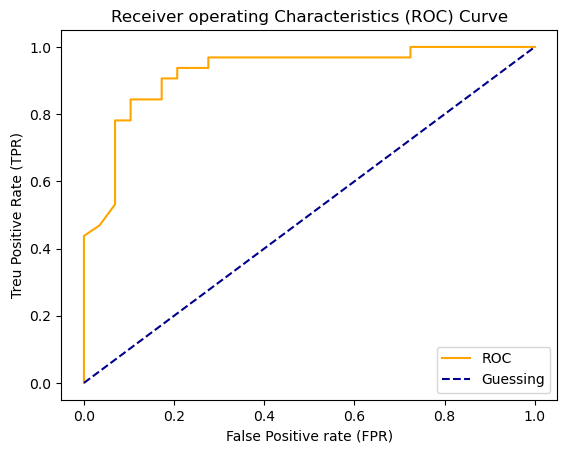

In [ ]:
# Creta a function for plotting ROC Curves

import matplotlib.pyplot as plt 

def plot_roc_curve(fpr,tpr):

    #Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")

    #plot a line with no predective power (baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False Positive rate (FPR)")
    plt.ylabel("Treu Positive Rate (TPR)")
    plt.title("Receiver operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9240301724137931

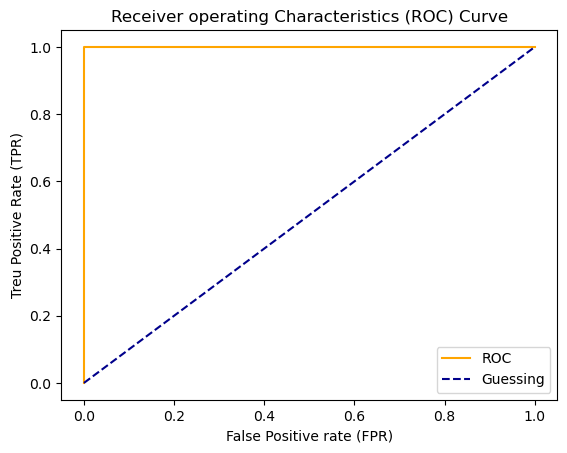

In [ ]:
#plot perfect ROC Curve and AUC Curev

fpr, tpr , thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_Test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 3, 29]], dtype=int64)

In [ ]:
#Visualize Confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,3,29


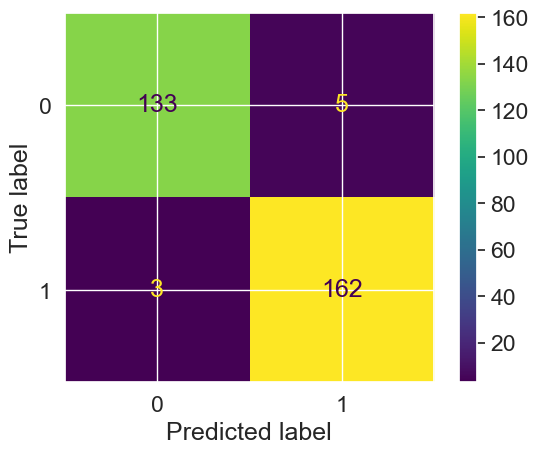

In [ ]:
# Make confusion matrix using SKLearn inbuilt library

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

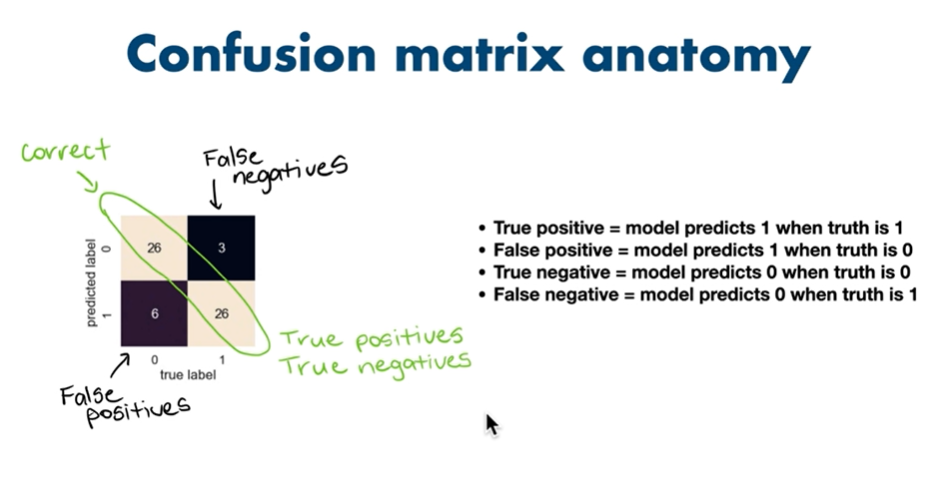

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



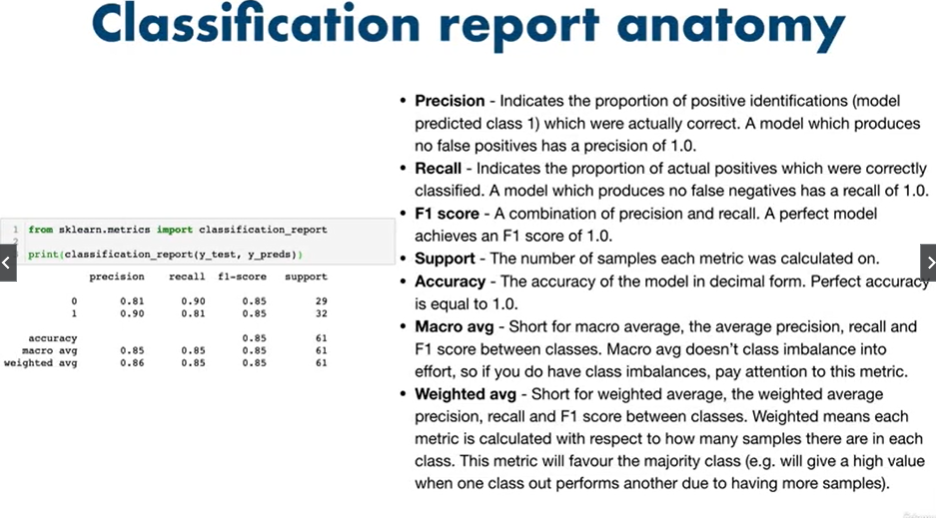

In [ ]:
# where precision and recall become valuable/Important

disease_true = np.zeros(1000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(1000) #Model predicts only zeros

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))



c:\Users\Tejas\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tejas\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Tejas\anaconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


### 4.2.2 Regression model Evaluation metrics

model evaluation metrics Documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

Covered Methods:

    1. R^2 (R squared method) or coefficient of determination.

    2. Mean Absolute Error.
    
    3. Mean Squared Error.

    R^2 : compares models predictions to the mean of targets. Values can range from negative infinity to one.

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(X_Train,y_train)

model.score(X_Test,y_test)

0.8065734772187598

In [8]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
y_test.mean()

2.0550030959302323

In [12]:
from sklearn.metrics import r2_score

#fill an array with y_test_mean
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [14]:
# Zero model score by predicting each value as mean 
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

In [15]:
# Best Score
r2_score(y_true=y_test,y_pred=y_test)

1.0

**Mean Absolute Error (MAE)**

MAE is avg of the absolute difference between predictions and actual values
It gives you an idea of how wrong your model predictions are.

In [16]:
#MAE

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_Test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.32659871732073664

In [21]:
df = pd.DataFrame(data={"Actual values":y_test,"predicted":y_preds})

df["differences"] = df["predicted"] - df["Actual values"]

df.head(10)

,Actual values,predicted,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [24]:
#MAE using formuales and differences
np.abs(df["differences"]).mean()

0.32659871732073664

**Mean Squared Error**

MSE is mean of the square of the errors between actual and predicted values

In [25]:
#Mean Squared Error

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_Test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [26]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,Actual values,predicted,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [27]:
# CAlculate MSE by hand

squared = np.square(df["differences"])

squared.mean()

0.2534678520824551

In [28]:
df.iloc[0]

Actual values          0.477000
predicted              0.493840
differences            0.016840
squared_differences    0.000284
Name: 20046, dtype: float64

In [36]:
### Finally using the scoring parameter

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [37]:
np.random.seed(42)

#Cross validation 
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [38]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [40]:
np.random.seed(42)

# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [41]:
np.random.seed(42)

# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [42]:
# scoring parameter for regression problem

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [45]:
np.random.seed(42)

cv_r2 = cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv_r2)

0.6545458023124507

In [47]:
# Mean squared Error

cv_mse = cross_val_score(model,X,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.45777196104248397

In [48]:
# Mean Absolute Error

cv_mae = cross_val_score(model,X,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.481087473638566

## 4.3 Using Different Evaluation Metrics as Scikit Learn Functions

The 3rd way to evaluate scikit learn ML models/estimators is to using the sklearn.metrics modules

In [51]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

#Create X & y

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#Split the data

X_Train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#create model

clf = RandomForestClassifier(n_estimators=100)

#Fit the Model
clf.fit(X_Train,y_train)

y_preds = clf.predict(X_Test)

#Evaluate model using evaluation functions
print("Classifier metrics on test :")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision Score {precision_score(y_test,y_preds)}")
print(f"Recall {recall_score(y_test,y_preds)}")
print(f"F1 Score {f1_score(y_test,y_preds)}")


Classifier metrics on test :
Accuracy: 85.25%
Precision Score 0.8484848484848485
Recall 0.875
F1 Score 0.8615384615384615


In [58]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

#Create X & y

X = housing_df.drop("target",axis=1)
y = housing_df["target"]

#Split the data

X_Train,X_Test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#create model

model = RandomForestRegressor()

#Fit the Model
model.fit(X_Train,y_train)

y_preds = model.predict(X_Test)

#Evaluate model using evaluation functions
print("Regressor  metrics on test :")
print(f"R2 : {r2_score(y_test, y_preds)*100:.2f}%")
print(f"MAE :{mean_absolute_error(y_test,y_preds)}")
print(f"MSE :{mean_squared_error(y_test,y_preds)}")


Regressor  metrics on test :
R2 : 80.66%
MAE :0.32659871732073664
MSE :0.2534678520824551


## 5. Improving a Model

First Predictions = baseline predictions
First Model = baseline model

From a data perspective:
* Could we collect more data? (more data the better it is)
* Could we improve our data?

From a Model Perspective: 
* Is there a better model we could use?

Params v/s Hyper-Params

* Parameters = model find these patterns in data
* Hyper Parameters = settings on a model you can adjust to (potentially) improve its ability to find pattern

In [60]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by Hand

In [62]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We' re going to try and adjust:

* maxdepth
* max features
* min_samples_leaf
* min_samples_split
* n_estimators

In [64]:
def evaluate_preds(y_test,y_preds):
    """Performs evaluation comparison on y_true labels v/s y_pred labels
    on a classification
    """

    accuracy = accuracy_score(y_test,y_preds)
    precision = precision_score(y_test,y_preds)
    recall = recall_score(y_test,y_preds)
    f1 = f1_score(y_test,y_preds)

    metric_dict = {"accuracy":round(accuracy,2),
                  "precision": round(precision,2),
                  "recall": round(recall),
                  "f1":round(f1,2)}
    
    print("Classifier metrics on test : *******")
    print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
    print(f"Precision Score {precision_score(y_test,y_preds)}")
    print(f"Recall {recall_score(y_test,y_preds)}")
    print(f"F1 Score {f1_score(y_test,y_preds)}")

    return metric_dict

In [67]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split int oX & Y

X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

#split the data

train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split+0.15*len(heart_disease_shuffled)) #15% of data

X_Train,y_train = X[:train_split],y[:train_split]
X_valid, y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_Test,y_test = X[valid_split:],y[:valid_split]

clf = RandomForestClassifier()

clf.fit(X_Train,y_train)

y_preds = clf.predict(X_valid)

baseline = evaluate_preds(y_valid,y_preds)
baseline

Classifier metrics on test : *******
Accuracy: 82.22%
Precision Score 0.8148148148148148
Recall 0.88
F1 Score 0.8461538461538461


{'accuracy': 0.82, 'precision': 0.81, 'recall': 1, 'f1': 0.85}

In [72]:
np.random.seed(42)

clf2 = RandomForestClassifier(n_estimators=500)

clf2.fit(X_Train,y_train)

y_preds2 = clf2.predict(X_valid)

baseline2 = evaluate_preds(y_valid,y_preds2)
baseline2

Classifier metrics on test : *******
Accuracy: 82.22%
Precision Score 0.8148148148148148
Recall 0.88
F1 Score 0.8461538461538461


{'accuracy': 0.82, 'precision': 0.81, 'recall': 1, 'f1': 0.85}

In [75]:
clf3 = RandomForestClassifier(n_estimators=300,max_depth=30)
clf3.fit(X_Train,y_train)

y_preds3 = clf3.predict(X_valid)

baseline3 = evaluate_preds(y_valid,y_preds3)
baseline3

Classifier metrics on test : *******
Accuracy: 82.22%
Precision Score 0.8148148148148148
Recall 0.88
F1 Score 0.8461538461538461


{'accuracy': 0.82, 'precision': 0.81, 'recall': 1, 'f1': 0.85}

### 5.2 Hyper parameter tuning with RandomizedSearchCV